# Customer Segmentation using K-Means

In [ ]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


As you can see, we have 8 columns of data for each row and each row represents an item purchased. This isn’t that helpful yet, so let’s clean and organize this data in a way that allows us to formulate more actionable insights.

In [3]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
data[['Quantity','UnitPrice','CustomerID']].describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleanup

1. Missing Values
2. Deleted Cancelled Orders
3. Calculate Total Sales
4. Aggregate by customerID


In [5]:
# Checking for missing values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.loc[data['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [7]:
print(data.shape)
data = data.dropna(subset = ['Description'])
print(data.shape)

(541909, 8)
(540455, 8)


In [8]:
df_customer_missing = data.loc[data['CustomerID'].isnull()]
df_customer_missing.shape

(133626, 8)

In [9]:
print(data.shape)
data = data.dropna(subset = ['CustomerID'])
print(data.shape)

(540455, 8)
(406829, 8)


In [10]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
data['sales'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
data[data['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [13]:
# Delete the cancelled orders
print(data.shape)
data = data.loc[data['Quantity']>0]
print(data.shape)

(406829, 9)
(397924, 9)


In [14]:
data.groupby('CustomerID').count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,sales
CustomerID,,,,,,,,
12346.0,1,1,1,1,1,1,1,1
12347.0,182,182,182,182,182,182,182,182
12348.0,31,31,31,31,31,31,31,31
12349.0,73,73,73,73,73,73,73,73
12350.0,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...
18280.0,10,10,10,10,10,10,10,10
18281.0,7,7,7,7,7,7,7,7
18282.0,12,12,12,12,12,12,12,12


In [17]:
customer_data = data.groupby('CustomerID').agg({'InvoiceNo':'count', 'sales': 'sum'}).rename(columns={'InvoiceNo':'OrderCount','sales':'TotalSales'})
customer_data.head()

,OrderCount,TotalSales
CustomerID,,
12346.0,1,77183.60
12347.0,182,4310.00
12348.0,31,1797.24
12349.0,73,1757.55
12350.0,17,334.40


In [19]:
customer_data['AvgOrderValue'] = customer_data['TotalSales'] / customer_data['OrderCount']

In [20]:
customer_data.head()

,OrderCount,TotalSales,AvgOrderValue
CustomerID,,,
12346.0,1,77183.60,77183.600000
12347.0,182,4310.00,23.681319
12348.0,31,1797.24,57.975484
12349.0,73,1757.55,24.076027
12350.0,17,334.40,19.670588


### Normalize the data

Clustering algorithms like K-means are sensitive to the scales of the data used, so we’ll want to normalize the data.

Below is a screenshot from part of a StackExchange answer discussing why standardization or normalization is necessary for data used in K-means clustering. The screenshot is linked to the StackExchange question, so you can click on it and read the entirety of the discussion if you’d like more information.

In [21]:
# Normalize the Data
rank_data = customer_data.rank(method='first')
normalized_data = (rank_data - rank_data.mean()) / rank_data.std()
normalized_data.head(10)

,OrderCount,TotalSales,AvgOrderValue
CustomerID,,,
12346.0,-1.731452,1.724268,1.731452
12347.0,1.317947,1.464031,0.786298
12348.0,-0.292168,0.929189,1.440083
12349.0,0.567571,0.906837,0.809448
12350.0,-0.890872,-0.750376,0.360021
12352.0,0.705673,1.171863,1.068886
12353.0,-1.587763,-1.638853,0.676935
12354.0,0.336871,0.486946,0.159654
12355.0,-1.091238,-0.407119,1.220558


### Determine the number of K-clusters

1. The Elbow Method with the Sum of Squared Errors (SSE)

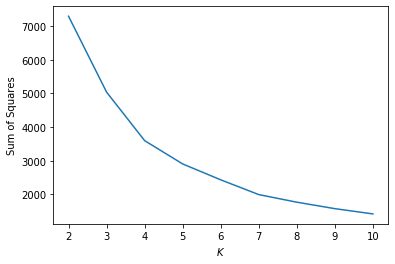

In [22]:
from sklearn import cluster
import numpy as np

sse = []
krange = list(range(2,11))
X = normalized_data[['TotalSales','OrderCount','AvgOrderValue']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(normalized_data[['TotalSales', 'OrderCount', 'AvgOrderValue']])

four_cluster_data = normalized_data[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_data['Cluster'] = kmeans.labels_

four_cluster_data.head(10)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724268,-1.731452,1.731452,0
12347.0,1.464031,1.317947,0.786298,1
12348.0,0.929189,-0.292168,1.440083,1
12349.0,0.906837,0.567571,0.809448,1
12350.0,-0.750376,-0.890872,0.360021,0
12352.0,1.171863,0.705673,1.068886,1
12353.0,-1.638853,-1.587763,0.676935,0
12354.0,0.486946,0.336871,0.159654,1
12355.0,-0.407119,-1.091238,1.220558,0


In [25]:
cluster1_metrics = kmeans.cluster_centers_[0]
cluster2_metrics = kmeans.cluster_centers_[1]
cluster3_metrics = kmeans.cluster_centers_[2]
cluster4_metrics = kmeans.cluster_centers_[3]

df = [cluster1_metrics, cluster2_metrics, cluster3_metrics, cluster4_metrics]
cluster_center_data = pd.DataFrame(df)

cluster_center_data.columns = four_cluster_data.columns[0:3]
cluster_center_data

,TotalSales,OrderCount,AvgOrderValue
0,-0.560298,-1.070750,0.954818
1,1.090597,0.728978,0.766911
2,-0.964404,-0.534126,-0.786127
3,0.544254,0.991121,-0.953622


In [27]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

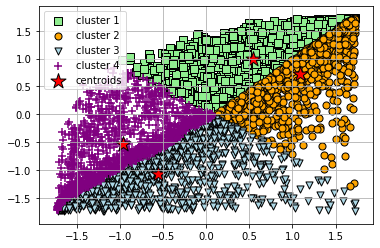

In [29]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='purple',
    marker='+', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()